### Geochemical data analysis and visualization of García et al, 2021 - Geochemistry and mineralogy of La Pava, Muzo-Quípama: Implications for emerald exploration in Colombia

In [1]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import pandas as pd
import re
import seaborn as sns

### Data loading and header information

Annex 1 -> Total rock geochemistry, X-Ray fluorescence Data and Gravimetry<br/>
Annex 2 -> ICP-MS Rare Earth Element ppm data


#### Code rocks

It-XX -> Río Itoco <br/> 
Pava-XX -> Quebrada La  Pava<br/>
Tu-XX -> Los Túneles


In [3]:
# Loading annex 1 and 2

ann1 = pd.read_excel("2021GarciaAnexo1.xlsx")
ann2 = pd.read_excel("2021GarciaAnexo2.xlsx")

In [22]:
ann1.head()

,Código,SiO2,Al2O3,TiO2,Fe2O3T,MgO,CaO,Na2O,K2O,P2O5,LOI,Total,Zr,Ge,Nb,Mo,Sn,Sb,Hf
0,It-1,"61,30","25,58","1,27","1,16","0,33","0,10","1,75","3,15","< 0,024","5,12","99,76",179,2,25,55,8,< 12,< 8
1,It-2,"64,25","23,95","1,01","0,69","0,31","0,11","1,68","3,02","< 0,024","4,79","99,81",153,2,20,52,< 8,< 12,< 8
2,It-3,"38,97","16,60","0,55","31,61","0,49","0,17","1,24","2,30",114,"7,69","99,73",94,< 2,12,26,12,< 12,19
3,It-4,"59,56","25,95","1,34","1,69","0,51","0,20","1,99","3,04",54,"5,42","99,75",166,4,27,32,< 8,< 12,< 8
4,It-5,"60,97","25,09","0,72","2,26","0,36","0,48","1,61","3,16","< 0,024","5,12","99,77",109,2,14,110,< 8,< 12,< 8


In [6]:
ann2.head()

,Código,Li,Cs,Be,V,Cr,Sc,Mn,Co,Ni,...,Sr,Cd,In,Ba,Y,Tl,Pb,Bi,Th,U
0,It-1,"38,6","8,0","4,3",288,130,"18,8","13,6","1,7","15,7",...,124,"0,3","0,0",607,"2,7","1,8","4,0","0,4","16,9","2,1"
1,It-2,"35,2","8,1","4,1",266,120,"19,5","12,5","0,8","10,0",...,120,"0,3","0,0",609,"2,9","1,7","3,1","0,3","18,2","2,1"
2,It-3,"19,7","3,1","7,3",220,82,"24,0","845,4","64,1","389,6",...,80,"9,0","0,0",459,"9,7","1,6","6,3","0,2","11,4","2,1"
3,It-4,"43,2","9,3","5,0",261,130,"19,1","11,1","1,7","14,0",...,140,"0,3","0,0",621,"2,4","1,6","5,0","0,6","18,5","2,0"
4,It-5,"43,2","7,0","4,1",458,130,"25,7","44,5","1,8","26,5",...,109,"0,5","0,1",714,"3,8","2,0","6,0","0,3","9,9","2,0"


### Ternary Diagrams SiO2, MgO, CaO

In [10]:
from pyrolite.plot import pyroplot

Select SiO2, MgO and CaO for ternary diagram from Annex 1 data. Replace commas with dots and treat as float

In [63]:
oxides = ["SiO2", "MgO", "CaO"]
ann1Ternary = ann1[oxides].copy()
ann1Ternary = ann1Ternary.apply(lambda x: x.str.replace(",", "."))
ann1Ternary = ann1Ternary.apply(lambda x: x.str.replace("<", "")) # Remove less than with empty space, :/
ann1Ternary["Class"] = ann1["Código"]
ann1Ternary.Class = ann1Ternary.Class.apply(lambda x: x[:2]) # Leave only first 2 letters of code to make three classes


In [64]:
ann1Ternary.head()

,SiO2,MgO,CaO,Class
0,61.30,0.33,0.10,It
1,64.25,0.31,0.11,It
2,38.97,0.49,0.17,It
3,59.56,0.51,0.20,It
4,60.97,0.36,0.48,It


In [65]:
ann1Ternary[oxides].astype('float').describe()

,SiO2,MgO,CaO
count,101.000000,101.000000,101.000000
mean,54.642079,1.041287,3.316139
std,10.874527,2.191843,7.122718
min,9.740000,0.100000,0.100000
25%,52.770000,0.270000,0.100000
50%,57.260000,0.330000,0.190000
75%,60.810000,0.490000,0.930000
max,70.520000,14.430000,32.750000


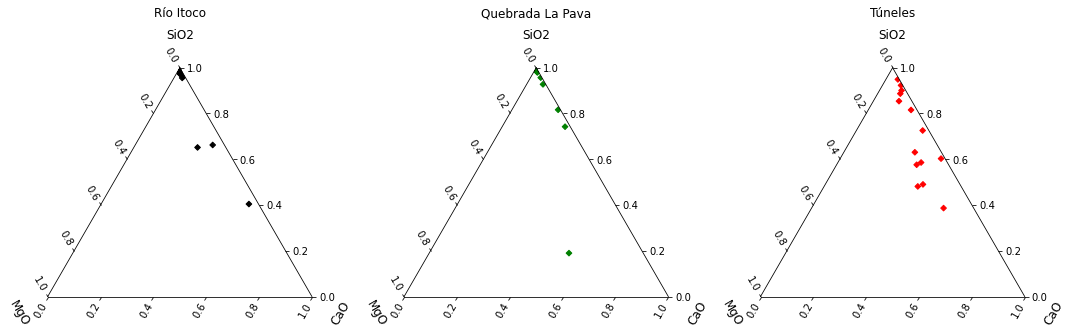

In [88]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 9))

ann1Ternary[oxides][ann1Ternary["Class"]=="It"].pyroplot.scatter(ax=ax[0], c="k").set_title("Río Itoco\n\n\n")
ann1Ternary[oxides][ann1Ternary["Class"]=="Pa"].pyroplot.scatter(ax=ax[1], c="g").set_title("Quebrada La Pava\n\n\n")
ann1Ternary[oxides][ann1Ternary["Class"]=="Tu"].pyroplot.scatter(ax=ax[2], c="r").set_title("Túneles\n\n\n")


ax = fig.orderedaxes  # creating scatter plots reorders axes, this is the correct order
plt.tight_layout()